<a href="https://colab.research.google.com/github/Muskan9065/hello-world/blob/MAIN/Human_Brain_Waves_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import os
import numpy as np
import pandas as pd
from scipy import signal
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import tensorflow 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM 
tf.keras.backend.clear_session()

import sklearn
print(sklearn.__version__)
!pip install --upgrade scikit-learn
from sklearn.metrics import confusion_matrix
from sklearn import datasets, tree, linear_model, svm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

1.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from google.colab import files
uploaded = files.upload()
import io
import pandas as pd
df2 = pd.read_csv(io.BytesIO(uploaded['emotions.csv']))

Saving emotions.csv to emotions.csv


In [10]:
len(df2)

2132

In [11]:
df2 = pd.read_csv('emotions.csv')

In [12]:
df2.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [13]:
df2.tail()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
2127,32.400,32.2,32.2,30.80,23.4,1.64,-2.03,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.2,47.2,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.20,1.09,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.8,-59.8,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.08,6.90,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.5,-10.5,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.46,1.58,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.0,-271.0,552.00,NEGATIVE
2131,27.000,32.0,31.8,25.00,28.9,4.99,1.95,6.210,3.490,-3.51,...,1.95,1.810,1.810,1.95,110.0,-6.71,22.8,22.8,-6.71,NEUTRAL


In [14]:
df2.shape

(2132, 2549)

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


In [16]:
df2.describe()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,15.256914,27.012462,-104.975629,13.605898,24.150483,0.025378,0.052282,0.301655,0.036793,0.083567,...,-22.938971,104.946111,-51.973647,-51.973647,104.946111,-6.934144,95.104886,-49.061255,-49.061255,95.104886
std,15.284621,9.265141,206.271960,16.874676,14.187340,17.981796,8.509174,68.098894,17.010031,18.935378,...,298.034311,212.532721,112.160233,112.160233,212.532721,281.040552,203.194976,106.486317,106.486317,203.194976
min,-61.300000,-114.000000,-970.000000,-137.000000,-217.000000,-218.000000,-255.000000,-1360.000000,-203.000000,-553.000000,...,-1180.000000,-921.000000,-504.000000,-504.000000,-921.000000,-1160.000000,-1010.000000,-521.000000,-521.000000,-1010.000000
25%,6.577500,26.075000,-195.000000,4.857500,23.600000,-3.105000,-1.340000,-4.002500,-2.905000,-2.622500,...,-106.500000,-8.365000,-92.900000,-92.900000,-8.365000,-102.500000,-8.837500,-87.150000,-87.150000,-8.837500
50%,14.100000,30.000000,14.950000,15.400000,25.200000,-0.044600,0.132000,0.957500,-0.099750,0.146500,...,83.850000,12.150000,-21.800000,-21.800000,12.150000,89.700000,13.400000,-24.100000,-24.100000,13.400000
75%,27.700000,31.400000,29.600000,26.500000,26.800000,2.920000,1.540000,6.735000,2.535000,2.870000,...,154.000000,177.000000,12.025000,12.025000,177.000000,153.000000,149.250000,10.925000,10.925000,149.250000
max,304.000000,42.300000,661.000000,206.000000,213.000000,402.000000,257.000000,1150.000000,349.000000,444.000000,...,1070.000000,843.000000,1490.000000,1490.000000,843.000000,1180.000000,888.000000,1670.000000,1670.000000,888.000000


*Separating Positive,Neagtive and Neutral dataframes for plotting*



In [21]:
pos = df2.loc[df2["label"]=="POSITIVE"]
sample_pos = pos.loc[2, 'fft_0_b':'fft_749_b']
neg = df2.loc[df2["label"]=="NEGATIVE"]
sample_neg = neg.loc[0, 'fft_0_b':'fft_749_b']
neu = df2.loc[df2["label"]=="NEUTRAL"]
sample_neu = neu.loc[1, 'fft_0_b':'fft_749_b']

*Plotting dataframe distribution*


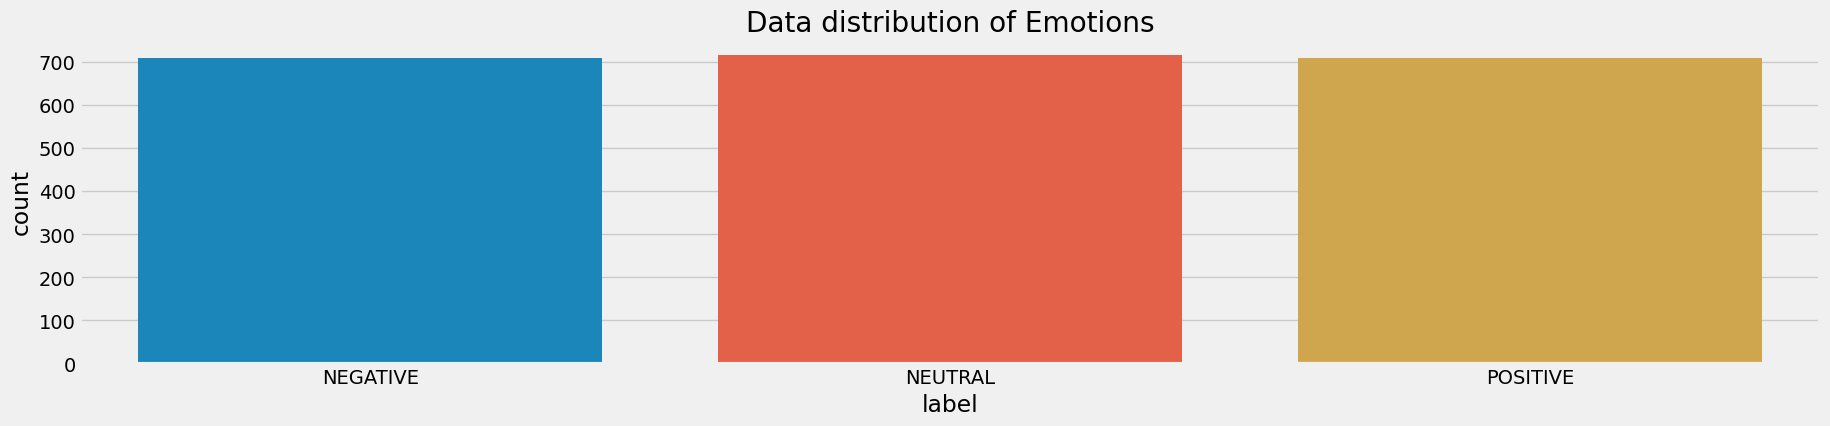

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
plt.title("Data distribution of Emotions")
plt.style.use('fivethirtyeight')
sns.countplot(x='label', data=df2)
plt.show()

*Plotting positive dataframe*

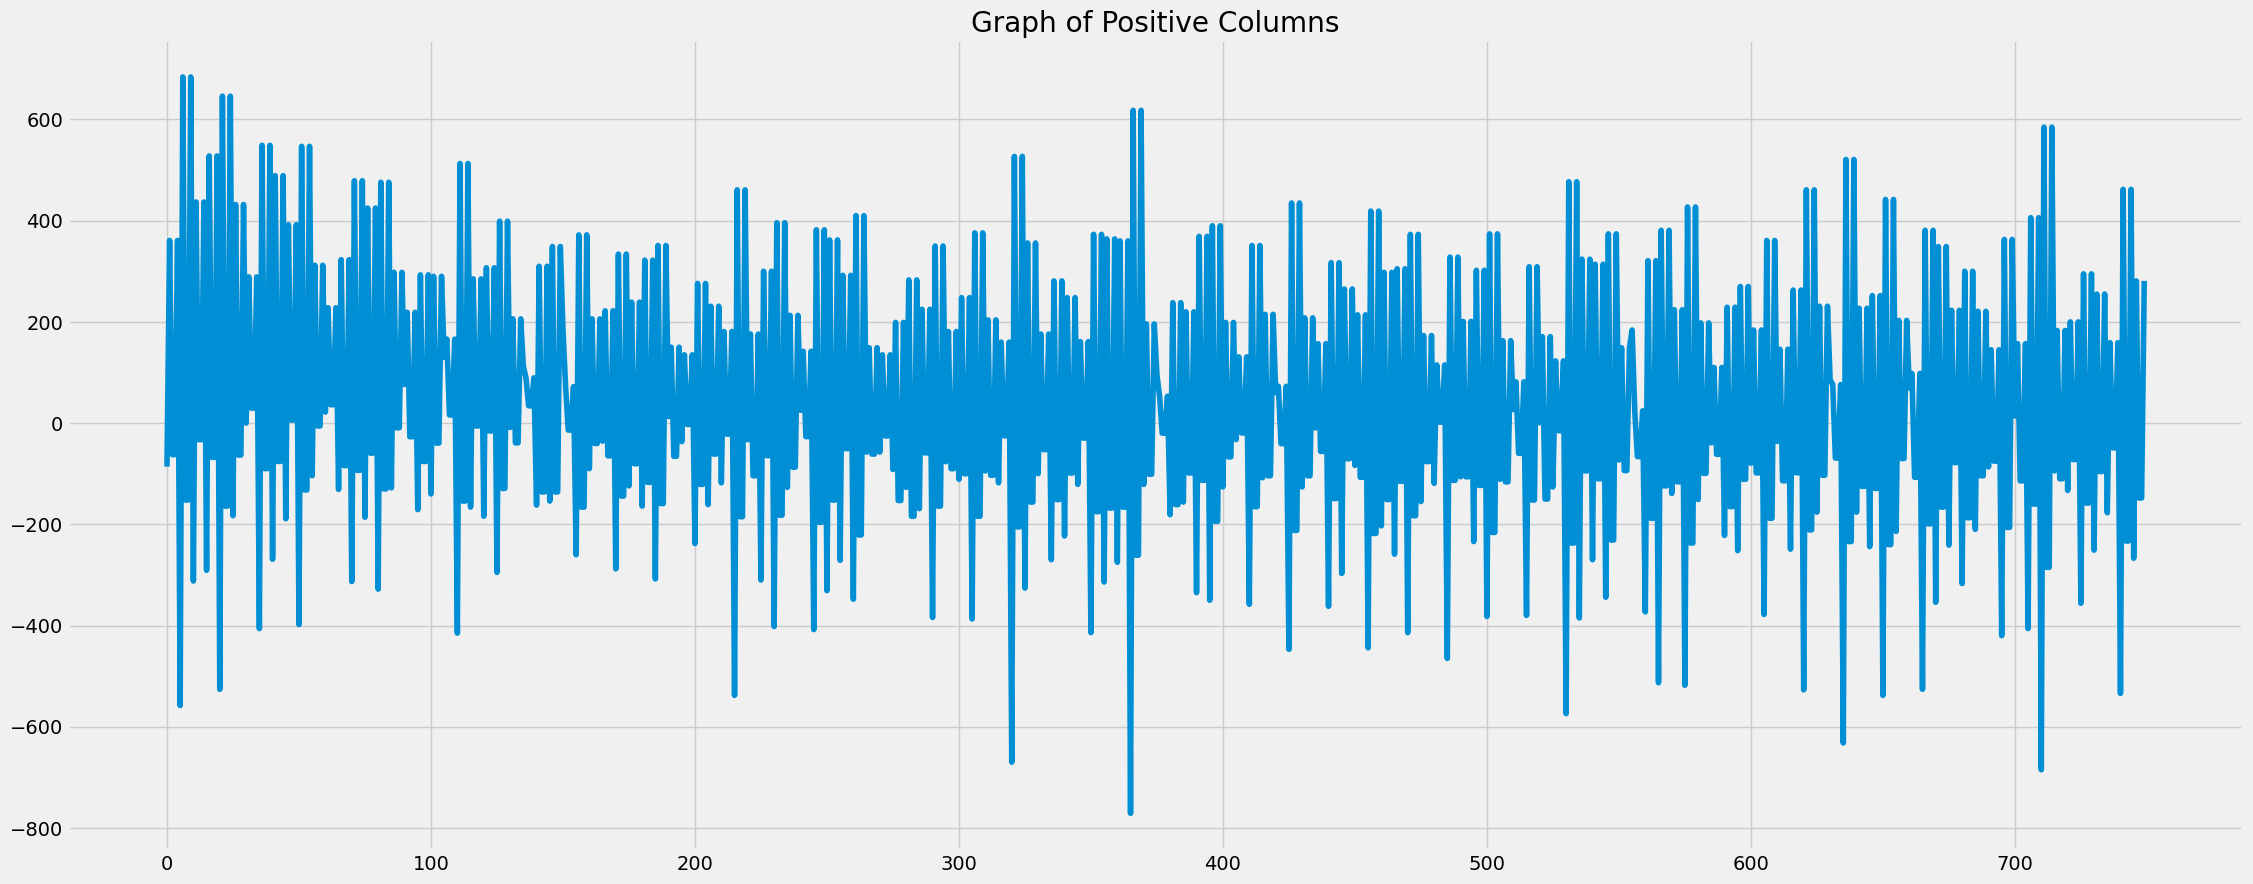

In [31]:
plt.figure(figsize=(25, 10))
plt.plot(range(len(sample_pos)), sample_pos)
plt.title("Graph of Positive Columns")
plt.show()

*Plotting negative dataframe*


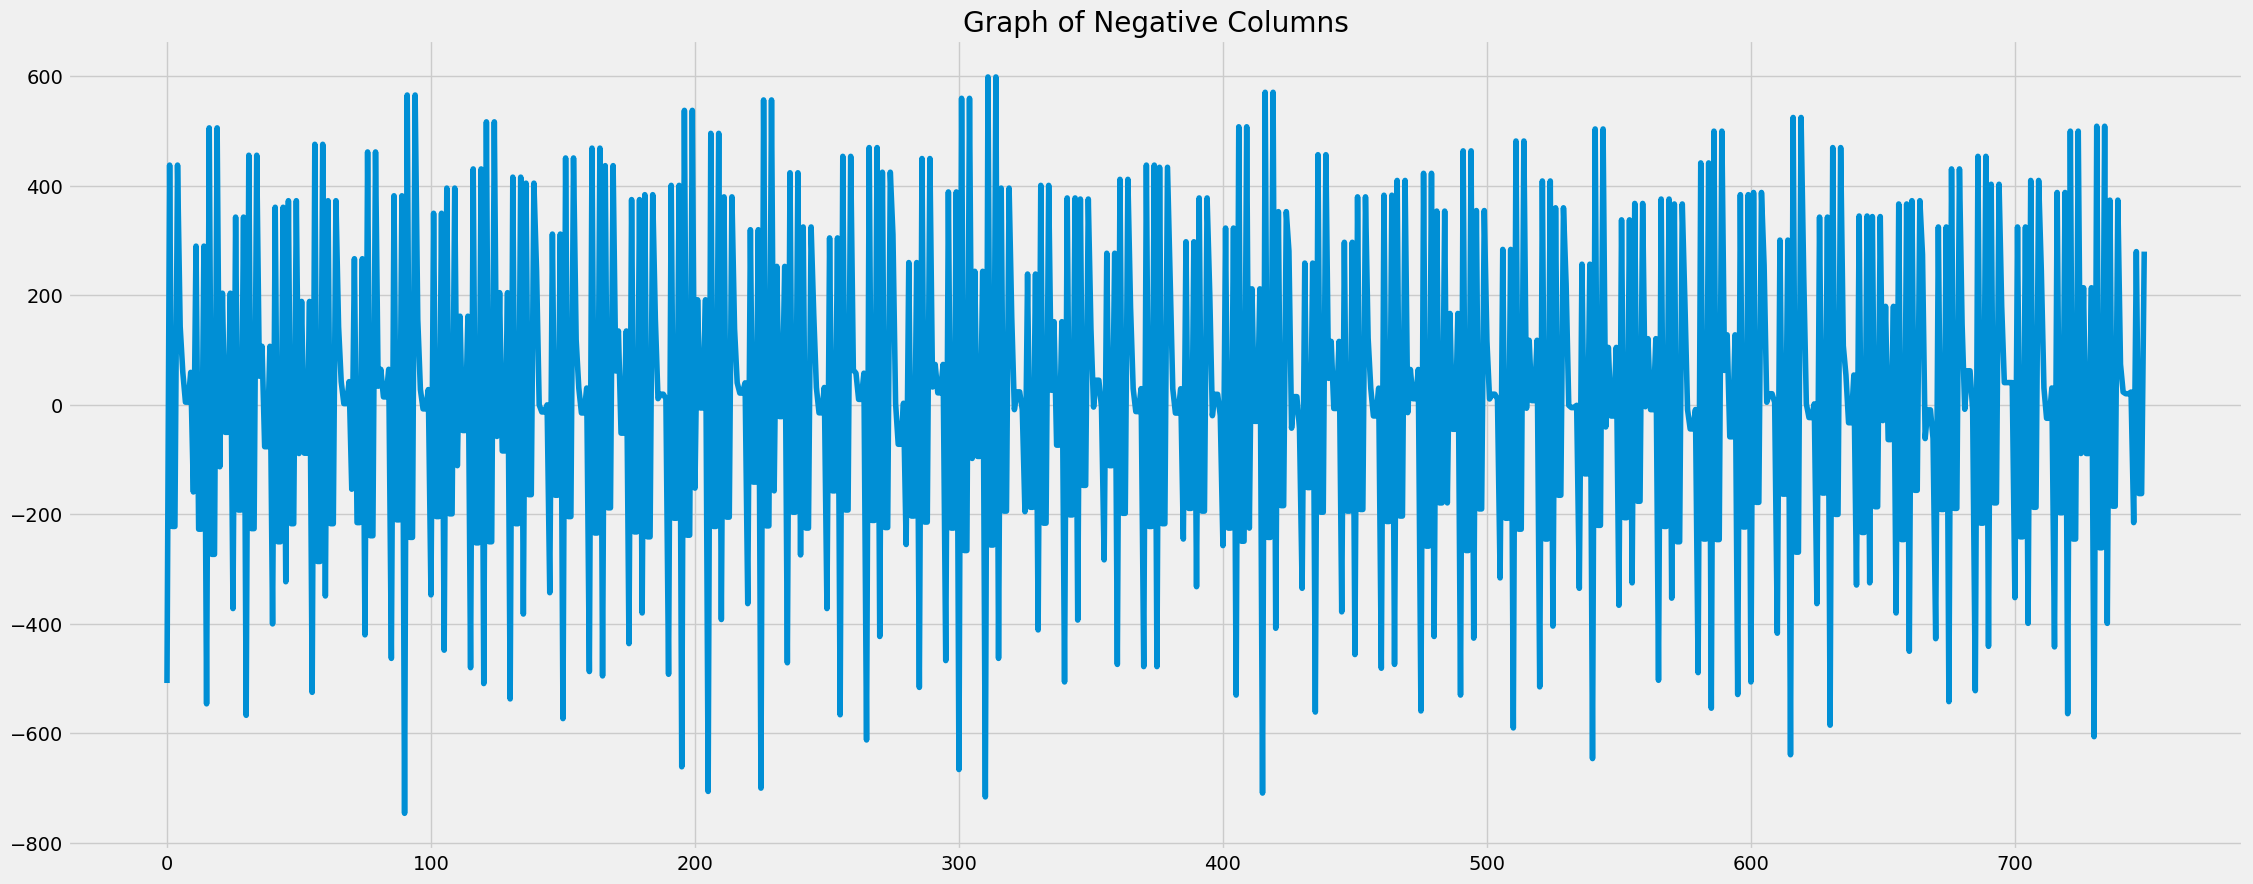

'Negative Signals are from less than 600 to and greater than -600'

In [32]:
plt.figure(figsize=(25, 10))
plt.plot(range(len(sample_neg)), sample_neg)
plt.title("Graph of Negative Columns")
plt.show()
'''Negative Signals are from less than 600 to and greater than -600'''

*Plotting Neutral dataframe*


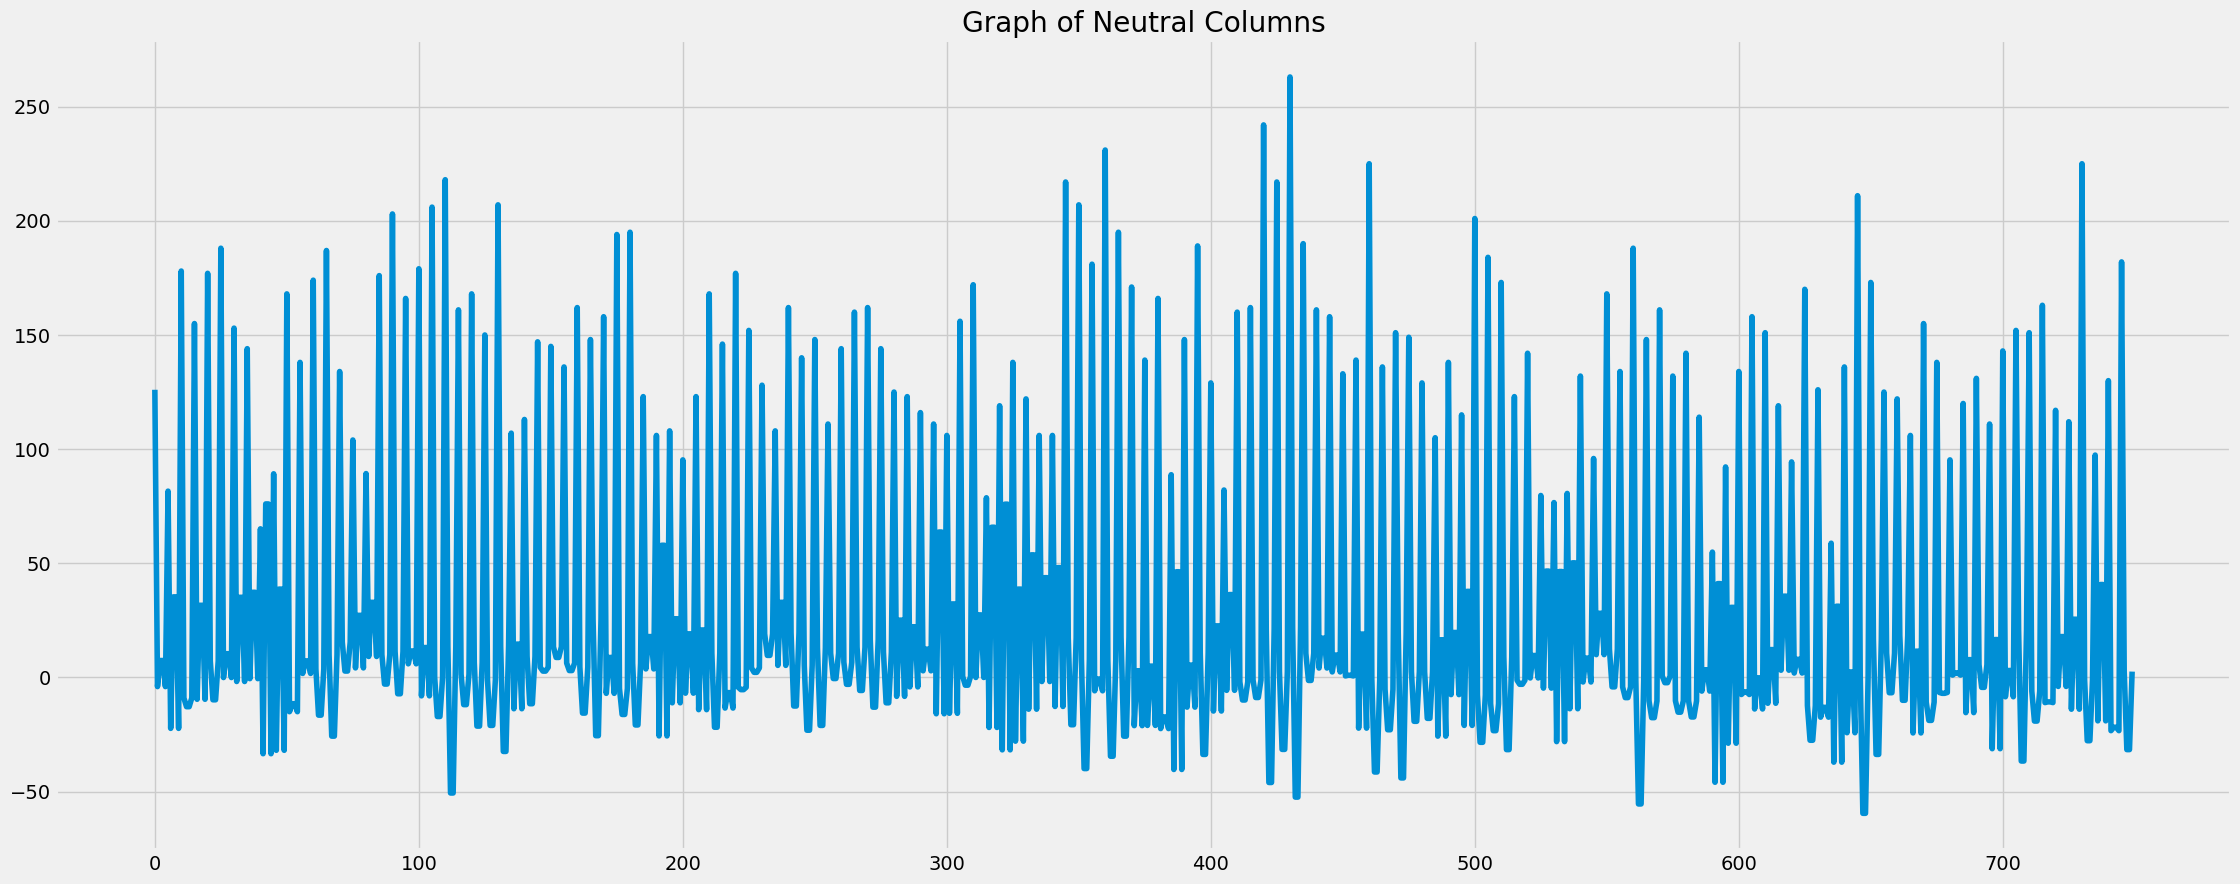

'Neutral Signals are in between -50 to 250'

In [33]:
plt.figure(figsize=(25, 10))
plt.plot(range(len(sample_neu)), sample_neu)
plt.title("Graph of Neutral Columns")
plt.show()
'''Neutral Signals are in between -50 to 250'''

*Encoding the labels into numbers*

In [17]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

def Transform_df2(df2):
    # Encoding Labels into numbers
    encoding_df2 = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )
    df2_encoded = df2.replace(encoding_df2)
    
    # Getting brain signals into X variable
    x = df2_encoded.drop(["label"], axis=1)
    
    # Getting labels into y variable
    y = df2_encoded.loc[:, 'label'].values
    
    # Scaling Brain Signals
    scaler = StandardScaler()
    scaler.fit(x)
    X = scaler.transform(x)
    
    # One hot encoding Labels 
    Y = to_categorical(y)
    
    return X, Y


Calling functions and splitting dataset into train and test


In [18]:
from sklearn.model_selection import train_test_split
X,Y = Transform_df2(df2)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

Checking the shape of dataset

In [19]:
x_train.shape[1]

2548

In [20]:
import tensorflow as tf

def create_model():
    inputs = tf.keras.Input(shape=(x_train.shape[1],))      #input layer of model for brain signals
    expand_dims = tf.expand_dims(inputs, axis=2)            #Hidden Layer for Brain signal using LSTM(GRU)
    gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
    flatten = tf.keras.layers.Flatten()(gru)                #Flatten Gru layer into vector form (one Dimensional array)
    outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)       #output latyer of Model

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    print(model.summary())
    return model


In [21]:
#creating model
lstmmodel = create_model()
#Compiling model 
lstmmodel.compile( 
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 2548, 1)          0         
                                                                 
 gru (GRU)                   (None, 2548, 256)         198912    
                                                                 
 flatten (Flatten)           (None, 652288)            0         
                                                                 
 dense (Dense)               (None, 3)                 1956867   
                                                                 
Total params: 2,155,779
Trainable params: 2,155,779
Non-trainable params: 0
_________________________________________________________________
None


Traing and Evaluation of model

In [22]:
history = lstmmodel.fit(x_train, y_train, epochs = 10, validation_split=0.1)
loss, acc = lstmmodel.evaluate(x_test, y_test)

Epoch 1/10
48/48 [==============================] - 345s 7s/step - loss: 0.6632 - accuracy: 0.8527 - val_loss: 0.6042 - val_accuracy: 0.8538
Epoch 2/10
48/48 [==============================] - 349s 7s/step - loss: 0.2464 - accuracy: 0.9153 - val_loss: 0.2695 - val_accuracy: 0.9357
Epoch 3/10
48/48 [==============================] - 348s 7s/step - loss: 0.1314 - accuracy: 0.9576 - val_loss: 0.2146 - val_accuracy: 0.9123
Epoch 4/10
48/48 [==============================] - 349s 7s/step - loss: 0.1185 - accuracy: 0.9589 - val_loss: 0.3318 - val_accuracy: 0.9123
Epoch 5/10
48/48 [==============================] - 349s 7s/step - loss: 0.0729 - accuracy: 0.9733 - val_loss: 0.1665 - val_accuracy: 0.9181
Epoch 6/10
48/48 [==============================] - 348s 7s/step - loss: 0.0478 - accuracy: 0.9844 - val_loss: 0.1410 - val_accuracy: 0.9357
Epoch 7/10
48/48 [==============================] - 348s 7s/step - loss: 0.0277 - accuracy: 0.9922 - val_loss: 0.1551 - val_accuracy: 0.9415
Epoch 8/10
48

Testing dataset: Loss and Accuracy of Model

In [23]:
print(f"Loss on testing: {loss*100}",f"\nAccuracy on Training: {acc*100}")

Loss on testing: 17.91875809431076 
Accuracy on Training: 95.08196711540222


Plotting Confusion Matrix for predicting model on the test dataset

In [24]:
pred  = lstmmodel.predict(x_test)

14/14 [==============================] - 29s 2s/step


Creating functions of Confusion Matrix

In [25]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(data.label.unique()))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Maximum score prediction to declare brain signals belongs to which emotion

In [26]:
pred1 = np.argmax(pred,axis=1)

hot encoding

In [27]:
y_test1 =   np.argmax(y_test,axis=1)

To print the actual and predicted outputs of Test Brain Signals



In [28]:
print("Predicted:  ",pred1[:10])
print("\n")
print("Actual: ",y_test1[:10])

Predicted:   [1 1 1 2 1 1 2 1 2 1]


Actual:  [1 1 1 2 1 1 2 1 2 1]


LSTM Confusion Matrix

In [48]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(confusion_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.GnBu):
    """
    This function plots a confusion matrix.
    """
    if normalize:
        confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = confusion_matrix.max() / 2.
    import itertools
    from itertools import product

    for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
        plt.text(j, i, format(confusion_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[150   3   0]
 [  3 129  10]
 [  0   5 127]]
Confusion matrix, without normalization


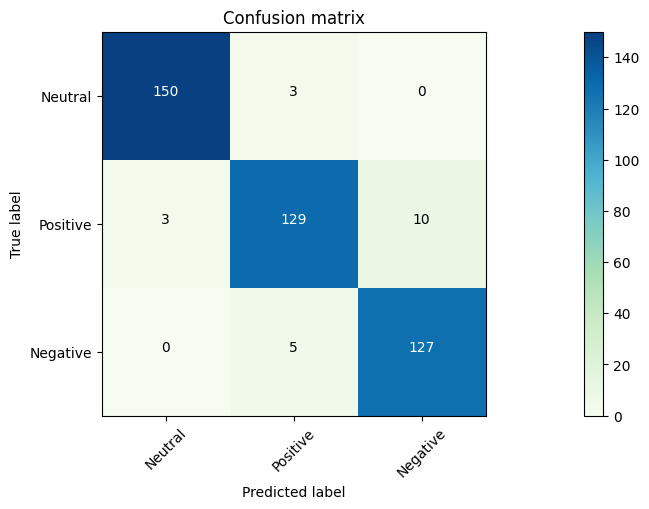

In [49]:
from sklearn.metrics import confusion_matrix
import numpy as np
c_matrix = confusion_matrix(y_test1, pred1)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(c_matrix)
plt.rcParams["figure.figsize"]=(20,5)
plt.figure()
plot_confusion_matrix(c_matrix,["Neutral","Positive","Negative"])

In [31]:
names1 = ["Neutral","Positive","Negative"]

To train the dataset using various classifiers

Gaussian Naive Bayes Classifier

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report
Classifier_g_NB = GaussianNB().fit(x_train, np.argmax(y_train,axis=1))
pred_g_NB = Classifier_g_NB.predict(x_test)
print ('\n*\t\tClassification Report GaussianNB:\n', classification_report(np.argmax(y_test,axis=1), pred_g_NB))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_g_NB)


*		Classification Report GaussianNB:
               precision    recall  f1-score   support

           0       0.65      0.97      0.78       153
           1       0.46      0.30      0.36       142
           2       0.81      0.66      0.73       132

    accuracy                           0.65       427
   macro avg       0.64      0.64      0.62       427
weighted avg       0.64      0.65      0.62       427



Support Vector Machine (SVM)


In [33]:
from sklearn import datasets, tree, linear_model, svm
Classifier_svm = svm.SVC(kernel='linear').fit(x_train, np.argmax(y_train,axis=1))
pred_svm = Classifier_svm.predict(x_test)
print ('\n*\t\tClassification Report SVM:\n', classification_report(np.argmax(y_test,axis=1), pred_svm))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_svm)


*		Classification Report SVM:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       153
           1       0.98      0.89      0.94       142
           2       0.94      0.99      0.97       132

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427



Logistic Regression Classifier

In [34]:
Classifier_LReg = linear_model.LogisticRegression(solver = 'liblinear', C = 75).fit(x_train, np.argmax(y_train,axis=1))
pred_LReg = Classifier_LReg.predict(x_test)
print ('\n*\t\tClassification Report Logistic Regression:\n', classification_report(np.argmax(y_test,axis=1), pred_LReg))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_LReg)


*		Classification Report Logistic Regression:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       153
           1       0.99      0.93      0.96       142
           2       0.96      0.99      0.97       132

    accuracy                           0.97       427
   macro avg       0.97      0.97      0.97       427
weighted avg       0.97      0.97      0.97       427



Decision Tree Classification

In [35]:
Classifier_dtree = tree.DecisionTreeClassifier().fit(x_train, np.argmax(y_train,axis=1))
pred_dtree = Classifier_dtree.predict(x_test)
print ('\n*\t\tClassification Report Decision Tree:\n', classification_report(np.argmax(y_test,axis=1), pred_dtree))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_dtree)


*		Classification Report Decision Tree:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       153
           1       0.94      0.94      0.94       142
           2       0.94      0.95      0.94       132

    accuracy                           0.96       427
   macro avg       0.95      0.95      0.95       427
weighted avg       0.96      0.96      0.96       427



Using Random Forest Classifier

In [36]:
Classifier_rforest = RandomForestClassifier(n_estimators = 50, random_state = 0).fit(x_train,np.argmax(y_train,axis=1))
pred_rfrt = Classifier_dtree.predict(x_test)
print ('\n*\t\tClassification Report Random Forest:\n', classification_report(np.argmax(y_test,axis=1), pred_rfrt))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_rfrt)


*		Classification Report Random Forest:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       153
           1       0.94      0.94      0.94       142
           2       0.94      0.95      0.94       132

    accuracy                           0.96       427
   macro avg       0.95      0.95      0.95       427
weighted avg       0.96      0.96      0.96       427



Plotting Confusion matrix of the used machine learning classifiers

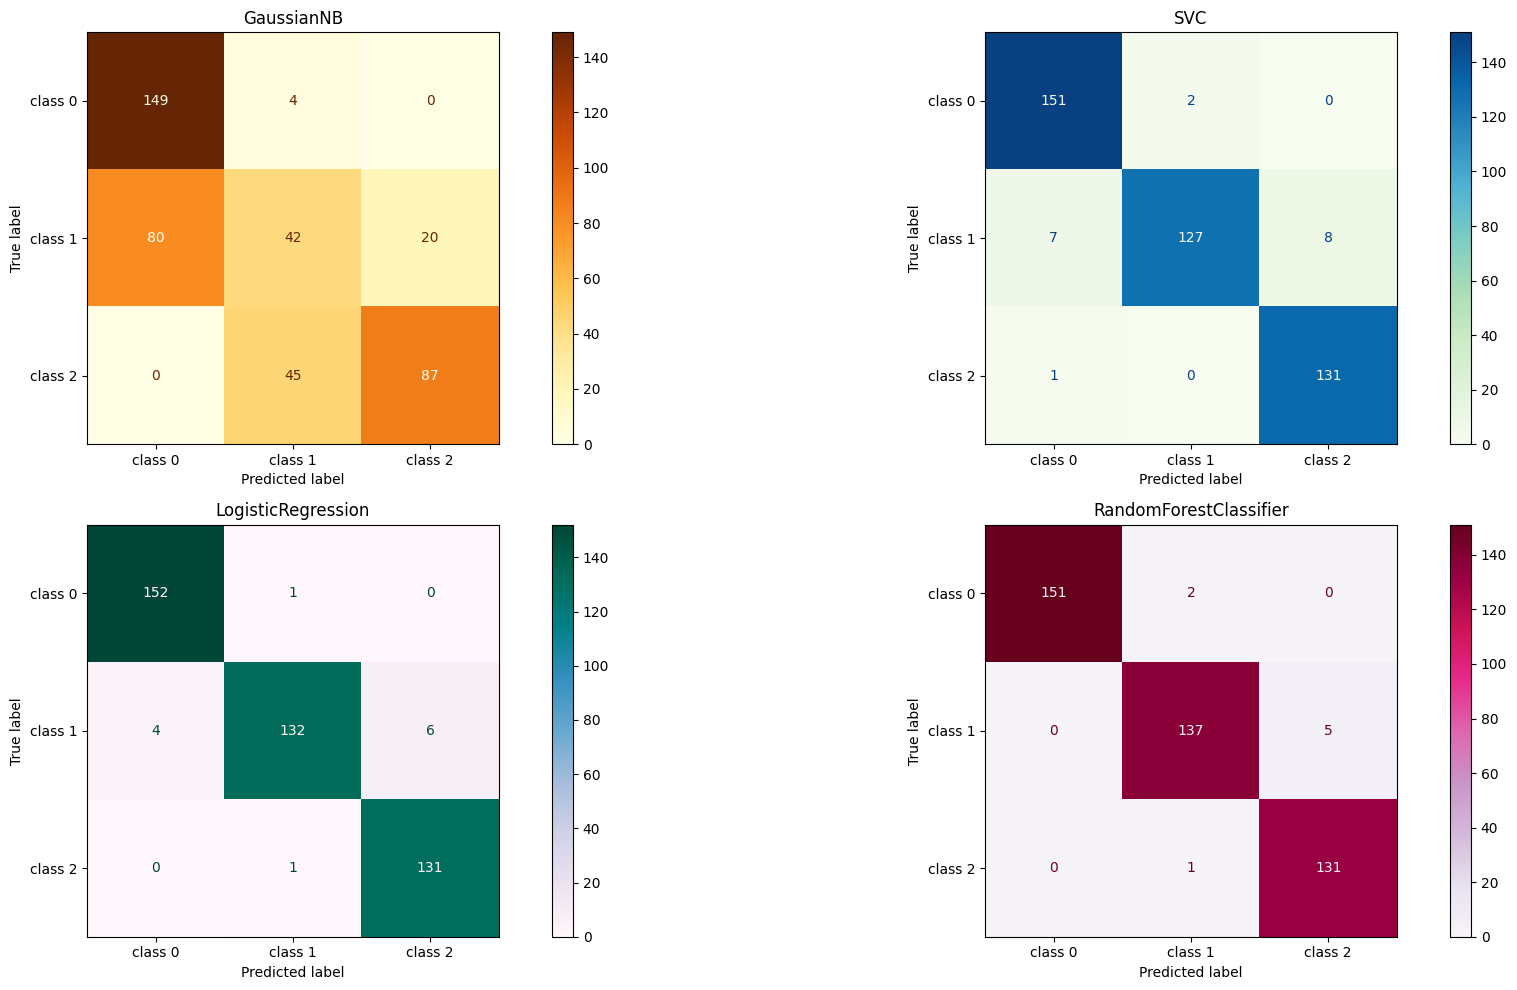

In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
classifiers = [GaussianNB(), svm.SVC(kernel='linear'),               linear_model.LogisticRegression(solver='liblinear', C=75),               RandomForestClassifier(n_estimators=50, random_state=0)]

# Train the classifiers
for cls in classifiers:
    cls.fit(x_train, np.argmax(y_train, axis=1))

colors = ['YlOrBr', 'GnBu', 'PuBuGn', 'PuRd']
class_names = ["class 0", "class 1", "class 2"]  # modify to match the number of ticks

# Plot the confusion matrices
for cls, ax, c in zip(classifiers, axes.flatten(), colors):
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test.argmax(axis=1), cls.predict(x_test)), 
                                  display_labels=class_names)
    disp.plot(ax=ax, cmap=c)
    ax.set_title(type(cls).__name__)

plt.tight_layout()
plt.show()

LSTM Model Classification Report

In [73]:
print('\n*\t\tLSTM Model Classification Report for Human Brain Waves Signal:\n', classification_report(np.argmax(y_test,axis=1), np.argmax(lstmmodel.predict(x_test),axis=1) ))

14/14 [==============================] - 29s 2s/step

*		LSTM Model Classification Report for Human Brain Waves Signal:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       153
           1       0.94      0.91      0.92       142
           2       0.93      0.96      0.94       132

    accuracy                           0.95       427
   macro avg       0.95      0.95      0.95       427
weighted avg       0.95      0.95      0.95       427



Now, here we are plotting the graph of the LSTM model- Training, Loss and Accuracy

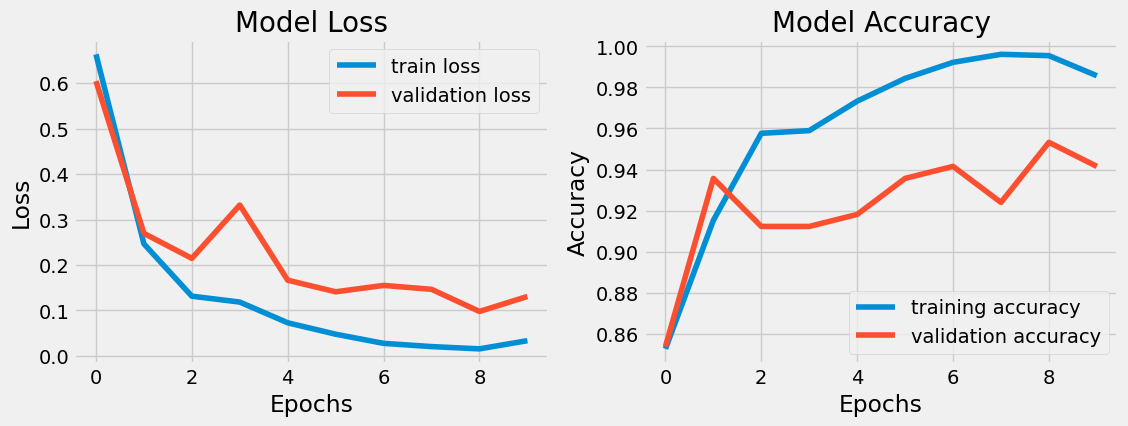

In [81]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss",fontsize=20)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train loss', 'validation loss'], loc ='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy",fontsize=20)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training accuracy', 'validation accuracy'], loc ='best')
plt.show()